In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import cv2
import glob
from PIL import Image

In [3]:
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [5]:
import warnings
warnings.filterwarnings("ignore")

# **Data Collection**

In [6]:
X = []
Y = []

In [7]:
def calc_hu_moments(img):
    moments = cv2.moments(img)
    hu_moments = cv2.HuMoments(moments)
    result = -np.sign(hu_moments) * np.log10(np.abs(hu_moments))
    return result

In [8]:
def histogram_equalization_rgb(image):
  r, g, b = cv2.split(image)
  
  r_eq = cv2.equalizeHist(r)
  g_eq = cv2.equalizeHist(g)
  b_eq = cv2.equalizeHist(b)
  
  img_equ = cv2.merge((r_eq, g_eq, b_eq))

  return img_equ

## **Bridge Decks**

In [9]:
bd_class1 = f"/Users/tipsijadav/Documents/crack_detection/data/D/CD/*"
bd_files_class1 = glob.glob(bd_class1)
bd_files_class1 = np.random.choice(bd_files_class1, size=2000, replace=False)

bd_class2 = f"/Users/tipsijadav/Documents/crack_detection/data/D/UD/*"
bd_files_class2 = glob.glob(bd_class2)
bd_files_class2 = np.random.choice(bd_files_class2, size=2000, replace=False)


In [10]:
for i in range(len(bd_files_class1)):
        image_read = Image.open(f"{bd_files_class1[i]}")
        image_color = np.array(image_read)
        
        image_equ = histogram_equalization_rgb(image_color)
        image_gray = cv2.cvtColor(image_equ, cv2.COLOR_RGB2GRAY)
        image_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)
                
        hu_moments_da = calc_hu_moments(image_thresh).reshape(1,-1)
        hu_moments_da = np.abs(hu_moments_da)
        phi_values = hu_moments_da[0][:]
        
        X.append(phi_values)
        Y.append(1)

In [11]:
for i in range(len(bd_files_class2)):
        image_read = Image.open(f"{bd_files_class2[i]}")
        image_color = np.array(image_read)
        
        image_equ = histogram_equalization_rgb(image_color)
        image_gray = cv2.cvtColor(image_equ, cv2.COLOR_RGB2GRAY)
        image_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)
                
        hu_moments_da = calc_hu_moments(image_thresh).reshape(1,-1)
        hu_moments_da = np.abs(hu_moments_da)
        phi_values = hu_moments_da[0][:]
        
        X.append(phi_values)
        Y.append(0)

## **Walls**

In [12]:
w_class1 = f"/Users/tipsijadav/Documents/crack_detection/data/W/CW/*"
w_files_class1 = glob.glob(w_class1)
w_files_class1 = np.random.choice(w_files_class1, size=2000, replace=False)

w_class2 = f"/Users/tipsijadav/Documents/crack_detection/data/W/UW/*"
w_files_class2 = glob.glob(w_class2)
w_files_class2 = np.random.choice(w_files_class2, size=2000, replace=False)

In [13]:
for i in range(len(w_files_class1)):
        image_read = Image.open(f"{w_files_class1[i]}")
        image_color = np.array(image_read)
        
        image_equ = histogram_equalization_rgb(image_color)
        image_gray = cv2.cvtColor(image_equ, cv2.COLOR_RGB2GRAY)
        image_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)
                
        hu_moments_da = calc_hu_moments(image_thresh).reshape(1,-1)
        hu_moments_da = np.abs(hu_moments_da)
        phi_values = hu_moments_da[0][:]
        
        X.append(phi_values)
        Y.append(1)

In [14]:
for i in range(len(w_files_class2)):
        image_read = Image.open(f"{w_files_class2[i]}")
        image_color = np.array(image_read)
        
        image_equ = histogram_equalization_rgb(image_color)
        image_gray = cv2.cvtColor(image_equ, cv2.COLOR_RGB2GRAY)
        image_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)
                
        hu_moments_da = calc_hu_moments(image_thresh).reshape(1,-1)
        hu_moments_da = np.abs(hu_moments_da)
        phi_values = hu_moments_da[0][:]
        
        X.append(phi_values)
        Y.append(0)

## **Pavements**

In [15]:
p_class1 = f"/Users/tipsijadav/Documents/crack_detection/data/P/CP/*"
p_files_class1 = glob.glob(p_class1)
p_files_class1 = np.random.choice(p_files_class1, size=2000, replace=False)

p_class2 = f"/Users/tipsijadav/Documents/crack_detection/data/P/UP/*"
p_files_class2 = glob.glob(p_class2)
p_files_class2 = np.random.choice(p_files_class2, size=2000, replace=False)

In [16]:
for i in range(len(p_files_class1)):
        image_read = Image.open(f"{p_files_class1[i]}")
        image_color = np.array(image_read)
        
        image_equ = histogram_equalization_rgb(image_color)
        image_gray = cv2.cvtColor(image_equ, cv2.COLOR_RGB2GRAY)
        image_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)
                
        hu_moments_da = calc_hu_moments(image_thresh).reshape(1,-1)
        hu_moments_da = np.abs(hu_moments_da)
        phi_values = hu_moments_da[0][:]
        
        X.append(phi_values)
        Y.append(1)

In [17]:
for i in range(len(p_files_class2)):
        image_read = Image.open(f"{p_files_class2[i]}")
        image_color = np.array(image_read)
        
        image_equ = histogram_equalization_rgb(image_color)
        image_gray = cv2.cvtColor(image_equ, cv2.COLOR_RGB2GRAY)
        image_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 13, 7)
                
        hu_moments_da = calc_hu_moments(image_thresh).reshape(1,-1)
        hu_moments_da = np.abs(hu_moments_da)
        phi_values = hu_moments_da[0][:]
        
        X.append(phi_values)
        Y.append(0)

In [18]:
X = np.array(X)
Y = np.array(Y)

In [19]:
data = np.hstack((X, Y.reshape(-1, 1)))

data_cleaned = data[~np.isnan(data).any(axis=1)]

X = data_cleaned[:, :-1]
Y = data_cleaned[:, -1].astype(int)

# **Train-Test Split**

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# **Standard Scaler**

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Principal Component Analysis**

In [22]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [23]:
class1 = X_test_pca[Y_test == 1]
class2 = X_test_pca[Y_test == 0]

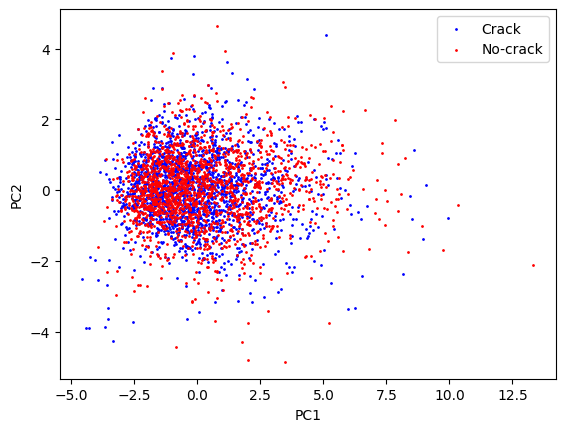

In [24]:
plt.scatter(class1[:,0], class1[:,1], c='blue', s=1, label='Crack')
plt.scatter(class2[:,0], class2[:,1], c='red', s=1, label='No-crack')

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.legend()
plt.show()

# **Davies-Bouldin Index**

In [25]:
db_index = davies_bouldin_score(X_test_pca, Y_test)
print(f"Davies-Bouldin Index: {db_index:.2f}")

Davies-Bouldin Index: 13.10


# **Support Vector Machine**

In [26]:
classes = ["Crack", "No-crack"]

In [27]:
svm_classifier = SVC(random_state=42)

In [28]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3],
    }

In [29]:
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_pca, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ....................C=0.01, degree=2, kernel=linear; total time=   0.7s
[CV] END ....................C=0.01, degree=2, kernel=linear; total time=   0.6s
[CV] END ....................C=0.01, degree=2, kernel=linear; total time=   0.8s
[CV] END ....................C=0.01, degree=2, kernel=linear; total time=   0.6s
[CV] END ....................C=0.01, degree=2, kernel=linear; total time=   0.6s
[CV] END .......................C=0.01, degree=2, kernel=rbf; total time=   1.2s
[CV] END .......................C=0.01, degree=2, kernel=rbf; total time=   1.0s
[CV] END .......................C=0.01, degree=2, kernel=rbf; total time=   1.0s
[CV] END .......................C=0.01, degree=2, kernel=rbf; total time=   1.0s
[CV] END .......................C=0.01, degree=2, kernel=rbf; total time=   0.9s
[CV] END ......................C=0.01, degree=2, kernel=poly; total time=   0.6s
[CV] END ......................C=0.01, degree=2

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [30]:
best_params = grid_search.best_params_
print("Best Parameters:\n")
print(f"C:{best_params['C']}")
print(f"kernel:{best_params['kernel']}")
print(f"degree:{best_params['degree']}")

Best Parameters:

C:0.01
kernel:rbf
degree:2


In [31]:
svm = SVC(C=best_params['C'], kernel=best_params['kernel'], degree=best_params['degree'], probability=True)
svm.fit(X_train_pca, Y_train)

Y_test_pred = svm.predict(X_test_pca)
Y_test_prob = svm.predict_proba(X_test_pca)[:, 1]

In [32]:
best_acc = accuracy_score(Y_test, Y_test_pred)
print(f"Accuracy: {best_acc:.2f}")

Accuracy: 0.53


In [33]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = roc_auc_score(Y_test, Y_test_prob)

print(f"AUC score: {roc_auc:.2f}")

AUC score: 0.54


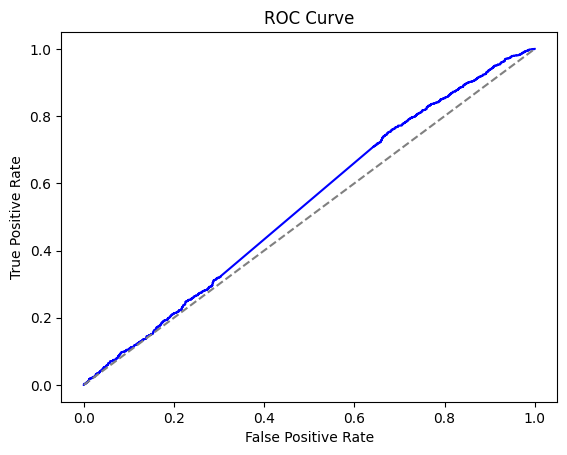

In [34]:
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()